### Dataset

In this homework, we'll build a model for predicting if we have an image of a dino or a dragon. For this, we will use the "Dino or Dragon?" dataset that can be downloaded from [Kaggle](https://www.kaggle.com/datasets/agrigorev/dino-or-dragon).

In the lectures we saw how to use a pre-trained neural network. In the homework, we'll train a much smaller model from scratch.

**Note:** You will need an environment with a GPU for this homework. We recommend to use [Saturn Cloud](https://bit.ly/saturn-mlzoomcamp).
You can also use a computer without a GPU (e.g. your laptop), but it will be slower.

### Data Preparation

The dataset contains around 1900 images of dinos and around 1900 images of dragons.

The dataset contains separate folders for training and validation.


### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

For clarification about kernel size and max pooling, check [Office Hours](https://www.youtube.com/watch?v=1WRgdBTUaAc).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
%matplotlib inline

In [2]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
path = './Dino or Dragon/train/dino'
name = '0af9b17d-b80f-405e-b555-4a9fac81da9c.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [ ]:
# model = Xception(weights='imagenet', input_shape=(299, 299, 3))

### The shape for input should be `(150, 150, 3)`

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [171]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    "./Dino or Dragon/train",
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_gen  = val_gen.flow_from_directory(
    "./Dino or Dragon/test",
    target_size=(150, 150),
    batch_size=32
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [172]:
train_ds.class_indices

{'dino': 0, 'dragon': 1}

In [173]:
# model = Xception(
#     weights='imagenet',
#     include_top=False,
#     input_shape=(150, 150, 3)
# )
# model.trainable = False
# base_model = tf.keras

In [174]:
inputs = keras.Input(shape=(150, 150, 3))

# base = model(inputs, training=False)

vectors = keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)

max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(vectors)

flatten_layers = tf.keras.layers.Flatten()(max_pool_2d)
danse_layer = tf.keras.layers.Dense(64, activation='relu')(flatten_layers)

outputs = keras.layers.Dense(1, activation='sigmoid')(danse_layer)

model = tf.keras.Model(inputs, outputs)
optimizer = keras.optimizers.SGD(
    learning_rate=0.002, momentum=0.8, nesterov=False, name="SGD")

loss = keras.losses.BinaryCrossentropy(from_logits=False)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

- `binary crossentropy`
- `focal loss`
- `mean squared error`
- `categorical crossentropy`

Note: since we specify an activation for the output layer, we don't need to set `from_logits=True`



answer: categorical crossentropy

### Question 2

What's the total number of parameters of the model? You can use the `summary` method for that.

- 9215873
- 11215873
- 14215873
- 19215873



In [175]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 175232)            0         
                                                                 
 dense_12 (Dense)            (None, 64)                11214912  
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                           

answer: 11,215,873

### Generators and Training

For the next two questions, use the following data generator for both train and validation:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/val directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and validation

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)
```


In [176]:
train_gen = ImageDataGenerator(rescale=1. / 255)

train_ds = train_gen.flow_from_directory(
    "./Dino or Dragon/train",
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

val_gen = ImageDataGenerator(rescale=1. / 255)

val_ds = val_gen.flow_from_directory(
    "./Dino or Dragon/test",
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [177]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
80/80 [==============================] - 9s 107ms/step - loss: 0.6199 - accuracy: 0.6650 - val_loss: 0.5080 - val_accuracy: 0.8249
Epoch 2/10
80/80 [==============================] - 8s 104ms/step - loss: 0.4833 - accuracy: 0.7886 - val_loss: 0.4164 - val_accuracy: 0.8452
Epoch 3/10
80/80 [==============================] - 8s 105ms/step - loss: 0.4034 - accuracy: 0.8287 - val_loss: 0.3746 - val_accuracy: 0.8325
Epoch 4/10
80/80 [==============================] - 8s 104ms/step - loss: 0.3463 - accuracy: 0.8639 - val_loss: 0.3424 - val_accuracy: 0.8579
Epoch 5/10
80/80 [==============================] - 8s 106ms/step - loss: 0.3086 - accuracy: 0.8752 - val_loss: 0.3116 - val_accuracy: 0.8756
Epoch 6/10
80/80 [==============================] - 8s 105ms/step - loss: 0.2809 - accuracy: 0.8921 - val_loss: 0.3112 - val_accuracy: 0.8629
Epoch 7/10
80/80 [==============================] - 8s 105ms/step - loss: 0.2594 - accuracy: 0.8996 - val_loss: 0.2950 - val_accuracy: 0.8756
Epoch 

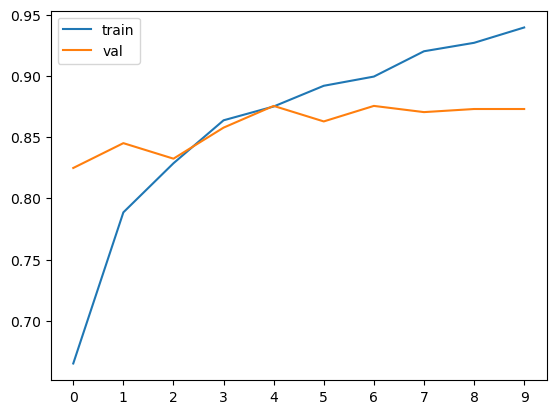

In [178]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

### Question 3

What is the median of training accuracy for all the epochs for this model?

- 0.40
- 0.60
- 0.90
- 0.20


In [179]:
np.median(history.history['accuracy'])

0.8836261034011841

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

- 0.11
- 0.66
- 0.99
- 0.33





In [180]:
np.std(history.history['loss'])

0.13163382984021924

answer: 0.11

### Data Augmentation

For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

* `rotation_range=40,`
* `width_shift_range=0.2,`
* `height_shift_range=0.2,`
* `shear_range=0.2,`
* `zoom_range=0.2,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

In [183]:
input_size = 150
train_gen = ImageDataGenerator(
    rescale=1./255,
#     preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode= 'nearest'
)

train_ds = train_gen.flow_from_directory(
    "./Dino or Dragon/train",
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)


Found 1594 images belonging to 2 classes.


### Question 5

Let's train our model for 10 more epochs using the same code as previously.
Make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of validation loss for all the epochs for the model trained with augmentations?

- 0.15
- 0.77
- 0.37
- 0.97


In [185]:
history = model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
80/80 [==============================] - 15s 190ms/step - loss: 0.4309 - accuracy: 0.8005 - val_loss: 0.4135 - val_accuracy: 0.8122
Epoch 2/20
80/80 [==============================] - 15s 189ms/step - loss: 0.4170 - accuracy: 0.8011 - val_loss: 0.4686 - val_accuracy: 0.7995
Epoch 3/20
80/80 [==============================] - 15s 188ms/step - loss: 0.3898 - accuracy: 0.8250 - val_loss: 0.3473 - val_accuracy: 0.8350
Epoch 4/20
80/80 [==============================] - 15s 188ms/step - loss: 0.3811 - accuracy: 0.8338 - val_loss: 0.3761 - val_accuracy: 0.8274
Epoch 5/20
80/80 [==============================] - 15s 190ms/step - loss: 0.3566 - accuracy: 0.8476 - val_loss: 0.3245 - val_accuracy: 0.8477
Epoch 6/20
80/80 [==============================] - 15s 187ms/step - loss: 0.3871 - accuracy: 0.8306 - val_loss: 0.4427 - val_accuracy: 0.7843
Epoch 7/20
80/80 [==============================] - 15s 187ms/step - loss: 0.3969 - accuracy: 0.8156 - val_loss: 0.5652 - val_accuracy: 0.7766

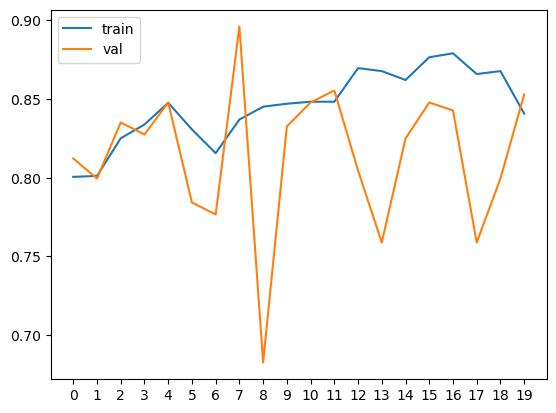

In [188]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(20))
plt.legend()

In [189]:
np.mean(history.history["val_loss"])

0.4546876519918442

answer:0.37

### Question 6

What's the average of validation accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

- 0.84
- 0.54
- 0.44
- 0.24

In [190]:
np.mean(history.history['val_accuracy'][15:])

0.820304560661316

## Submit the results

- Submit your results here: https://forms.gle/XdH5ztBddvTvxzpT6
- You can submit your solution multiple times. In this case, only the last submission will be used
- If your answer doesn't match options exactly, select the closest one


## Deadline

The deadline for submitting is 21 November 2022, 23:00 CEST.

After that, the form will be closed.